## Regression using Neural-Network, Keras API
* We can easily fit the regression data with Keras sequential model and predict the test data
    * using KerasRegressor wrapper
    * using Keras sequential model 

1. Preparing data
2. Defining the model
3. Fitting with KerasRegressor (error check and visualize results)
4. Fitting with NN - Sequential model (error check and visualize results)

In [1]:
#importing libraries
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error

features_shape: (220, 3)
label_shape: (220, 1)


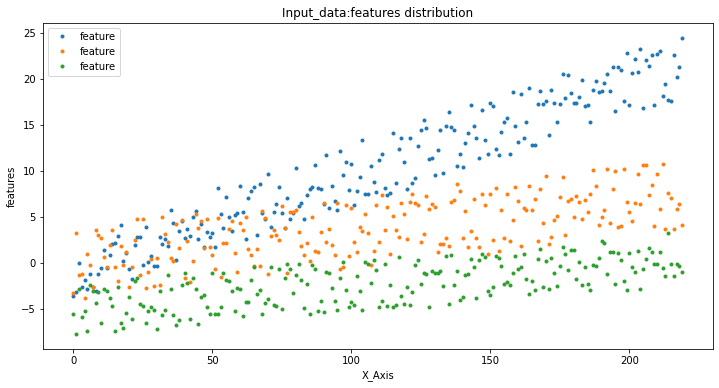

In [2]:
#Generate/Preparing data
random.seed(123)
def CreateDataset(N):
    x1,x2,x3,y = [],[],[],[]
    for i in range(N):
        xx1 = i/10+random.uniform(-4,3)
        xx2 = i/30+random.uniform(-4,4)
        xx3 = i/40+random.uniform(-3,3)-5
        yy = (xx1+xx2+xx3/2)/3
        x1.append([xx1])
        x2.append([xx2])
        x3.append([xx3])
        y.append([yy])
    return np.hstack([x1,x2,x3]), np.array(y)

N = 220
features,label = CreateDataset(N)
x_axis = range(N)

print('features_shape:',features.shape)
print('label_shape:',label.shape)

plt.figure(figsize=(12,6))
plt.plot(x_axis, features, 'o', label="feature", markersize=3)
plt.xlabel('X_Axis')
plt.ylabel('features')
plt.title('Input_data:features distribution')
plt.legend()
plt.show()
 

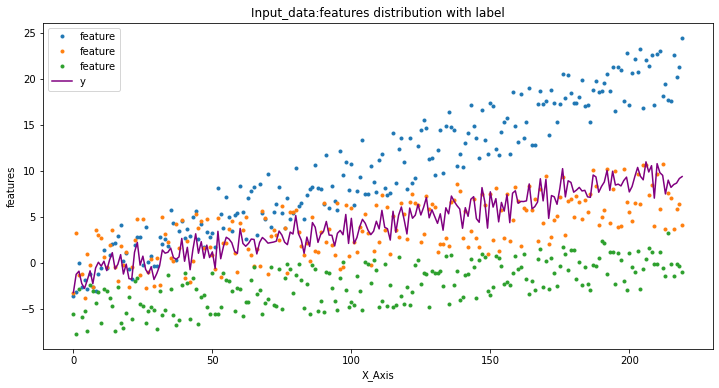

In [3]:
plt.figure(figsize=(12,6))
plt.plot(x_axis, features, 'o', label="feature", markersize=3)
plt.plot(x_axis, label, lw=1.5, color="purple", label="y")
plt.xlabel('X_Axis')
plt.ylabel('features')
plt.title('Input_data:features distribution with label')
plt.legend()
plt.show()
 

In [4]:
features.shape

(220, 3)

In [5]:
label.shape

(220, 1)

#### Purple-line is y output, and the remaining dots are features for x input.


In [6]:
#defining the model
#build a keras sequential model to use in KerasRegressor wrapper.

def BuildModel():
    model = Sequential()
    model.add(Dense(128, input_dim=3,activation='relu')) 
    model.add(Dense(32, activation='relu')) 
    model.add(Dense(8,activation='relu')) 
    model.add(Dense(1,activation='linear'))
    model.compile(loss="mean_squared_error", optimizer="adam")   
    return model
model=BuildModel()
BuildModel().summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               512       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 4,913
Trainable params: 4,913
Non-trainable params: 0
_________________________________________________________________


#### get_weights() for a Dense layer returns a list of two elements:
* first element contains the weights, and 
* second element contains the biases


In [7]:
weights = model.layers[0].get_weights()[0]
biases = model.layers[0].get_weights()[1]

In [8]:
weights.shape

(3, 128)

#### Bias represents an extra neuron included with each pre-output layer and stores the value of “1,” for each action
* shift the activation function
* helps the model in a way that it can fit best for the given data

In [9]:
biases.shape

(128,)

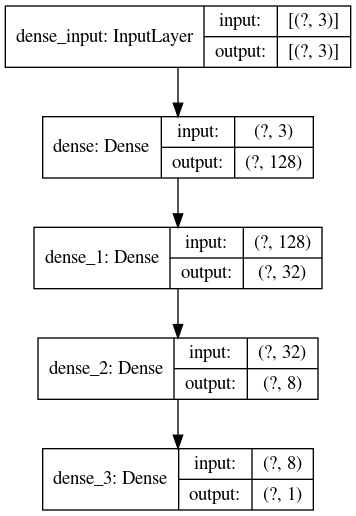

In [10]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

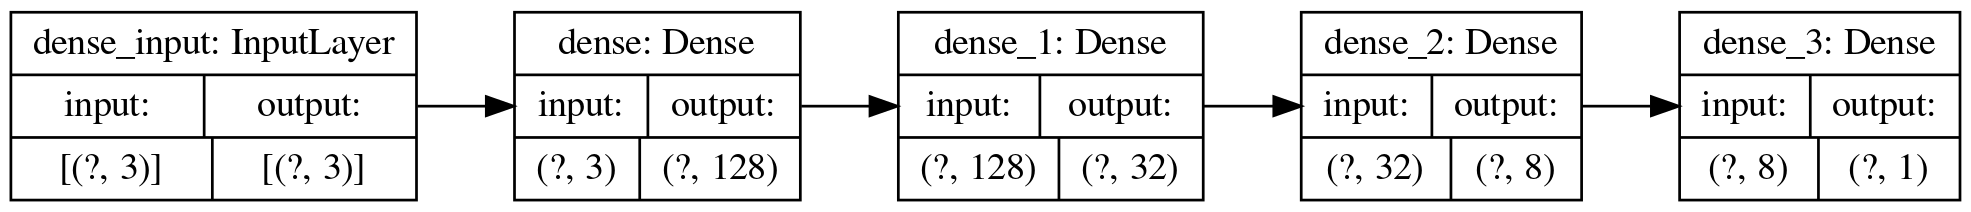

In [11]:
import tensorflow as tf
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    #show_dtype=True,
    show_layer_names=True,
    rankdir="LR", #'TB' creates a vertical plot; 'LR' creates a horizontal plot.
    expand_nested=True,
    dpi=196,
)

74/74 [==============================] - 0s 653us/step - loss: 2.1124
mse of keras_regrerssor: 0.06864559803208616


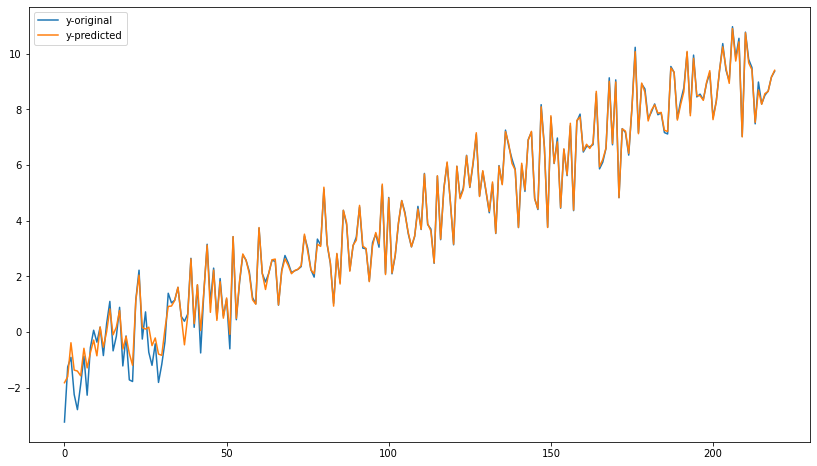

In [12]:
#fitting with KerasRegressor
#include the above model into KerasRegressor and fit model with x and y data. then, we can predict x data
regressor = KerasRegressor(build_fn=BuildModel,nb_epoch=100,batch_size=3)
regressor.fit(features,label) 

y_pred = regressor.predict(features)
 
#check the mean_squared_error
mse_kr = mean_squared_error(label, y_pred)
print('mse of keras_regrerssor:',mse_kr)
 
#plot the results
plt.figure(figsize=(14,8))
plt.plot(label, label="y-original")
plt.plot(y_pred, label="y-predicted")
plt.legend()
plt.show()

In [13]:
#fitting with keras sequential model
#model without a wrapper
model = BuildModel()
model.fit(features, label, epochs=80, verbose=1)

Epoch 1/80
7/7 [==============================] - 0s 807us/step - loss: 20.2340
Epoch 2/80
7/7 [==============================] - 0s 1ms/step - loss: 6.1109
Epoch 3/80
7/7 [==============================] - 0s 1ms/step - loss: 1.7766
Epoch 4/80
7/7 [==============================] - 0s 1ms/step - loss: 1.3738
Epoch 5/80
7/7 [==============================] - 0s 1ms/step - loss: 0.6076
Epoch 6/80
7/7 [==============================] - 0s 1ms/step - loss: 0.2924
Epoch 7/80
7/7 [==============================] - 0s 1ms/step - loss: 0.1745
Epoch 8/80
7/7 [==============================] - 0s 1ms/step - loss: 0.0883
Epoch 9/80
7/7 [==============================] - 0s 1ms/step - loss: 0.0726
Epoch 10/80
7/7 [==============================] - 0s 1ms/step - loss: 0.0437
Epoch 11/80
7/7 [==============================] - 0s 1ms/step - loss: 0.0326
Epoch 12/80
7/7 [==============================] - 0s 1ms/step - loss: 0.0229
Epoch 13/80
7/7 [==============================] - 0s 1ms/step - loss:

mse of keras_sequential/NN_model: 0.0002817162479817571


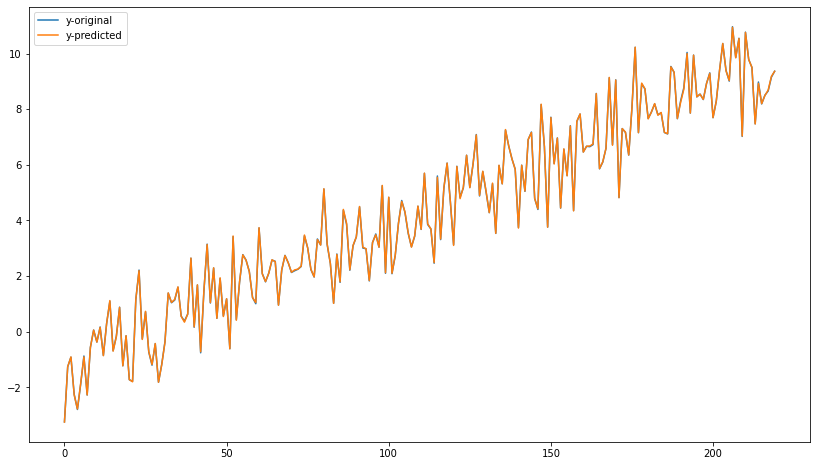

In [14]:
#prediction
y_model = model.predict(features)

#check a mean_squared_error
mse_model=mean_squared_error(label, y_model)
print('mse of keras_sequential/NN_model:',mse_model)
 
#plot the results
plt.figure(figsize=(14,8))
plt.plot(label, label="y-original")
plt.plot(y_model, label="y-predicted")
plt.legend()
plt.show()

### Take-home-points:

* Use the ADAM optimizer
* ReLU and it's types (i.e. LeakyReLu, PReLu, etc... are the best nonlinearity (activation function)
* DO add a bias in every layer
* Do NOT use an activation function at output layer
* Whiten (normalize) input data
* Scale input data in a way that reasonably preserves its dynamic range